In [1]:
import pandas as pd
from scipy import stats
import os
import glob

In [4]:
def rename_index(df):
  """Rename operations in the average result dataframe for clarity."""
  df.index = map(
    lambda s: s.replace("filtered ", "")
      .replace("of columns", "of series")
      .replace("addition of series", "series addition")
      .replace("multiplication of series", "series multiplication")
      .replace("arithmetic ops", "arithmetic")
      .replace("count index length", "count index"),
    df.index)
  return df

def annotate(ax):
  """Annotate the height of each bar in the plot."""
  for p in ax.patches:
    ax.annotate("%.2fs" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
 
def annotate_x_times_faster(ax, x_times_list):
  """Annotate PySpark is how many times faster per operation in the plot."""
  num_ops = len(x_times_list)
  for i, p in enumerate(ax.patches):
    if i < num_ops:  # The first half of ax.patches of Koalas; we only annotate Koalas patches
      ax.annotate("%.1fx" % x_times_list[i], (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(4, 10), textcoords='offset points', fontsize=8, weight='bold', color="#585858")

In [5]:
import pandas as pd

In [6]:
results_1file = pd.read_parquet("./single_node_results_120930_1file")
results_4files = pd.read_parquet("./single_node_results_150744_4files")

## Local execution - 1 file - 3376567 rows

In [7]:
one_file = pd.read_parquet('../data/yellow_tripdata_2023-12.parquet')
len(one_file)

3376567

In [8]:
parquet_files = glob.glob('../data/*.parquet')
df_list = [pd.read_parquet(file) for file in parquet_files]
combined_df = pd.concat(df_list, ignore_index=True)
len(combined_df)

12931345

In [10]:
results_1file

,PySpark,Dask
task,,
read file,0.187303,0.136477
count,0.196180,0.442867
mean,0.271599,0.312409
standard deviation,0.353475,0.330494
mean of columns addition,0.410502,0.371634
addition of columns,7.157562,0.352466
mean of columns multiplication,0.384705,0.354498
multiplication of columns,0.401257,0.353019
value counts,0.554913,0.369631


In [11]:
local_res_df = results_1file
local_res_df.columns = ['PySpark', 'Dask']
standard_ops = local_res_df.iloc[:14]
ops_with_filtering = local_res_df.iloc[14:]

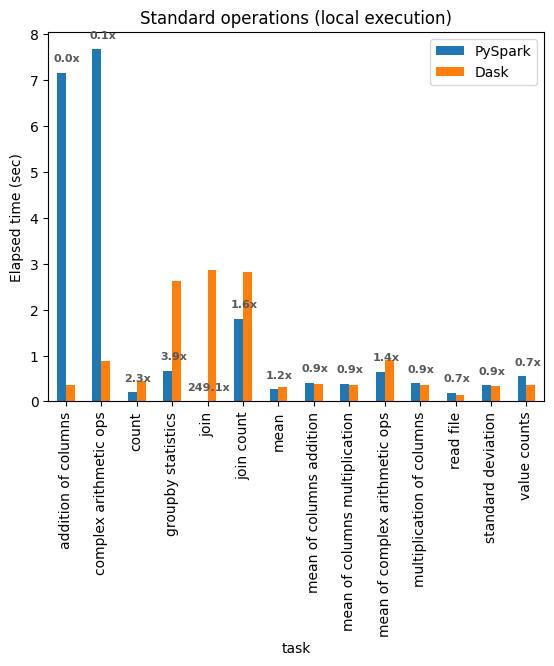

In [12]:
plot_title = 'Standard operations (local execution)'
 
ax = standard_ops.sort_index().plot.bar(title=plot_title)
ax.set_ylabel("Elapsed time (sec)")
 
tmp_df_x_times_faster = standard_ops.sort_index().copy()
tmp_df_x_times_faster['Dask / PySpark'] = tmp_df_x_times_faster.Dask / tmp_df_x_times_faster['PySpark']
tmp_df_x_times_faster['PySpark / Dask'] = tmp_df_x_times_faster['PySpark'] / tmp_df_x_times_faster.Dask
annotate_x_times_faster(ax, x_times_list=tmp_df_x_times_faster['Dask / PySpark'].to_list())

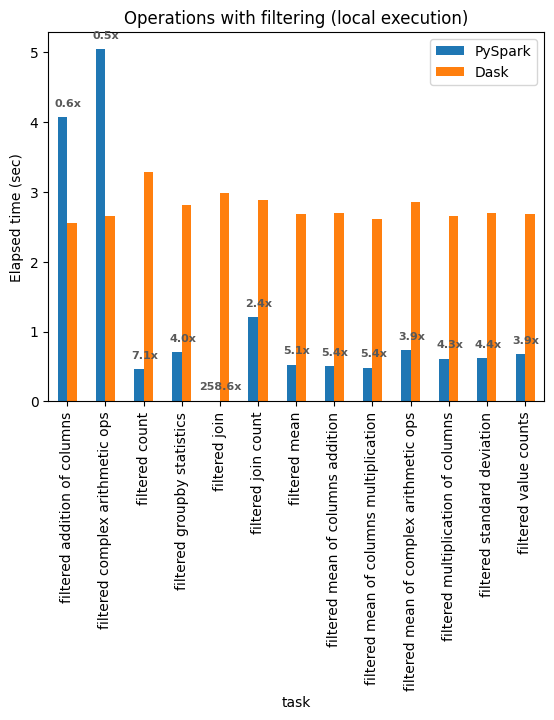

In [13]:
plot_title = 'Operations with filtering (local execution)'
 
ax = ops_with_filtering.sort_index().plot.bar(title=plot_title)
ax.set_ylabel("Elapsed time (sec)")
 
tmp_df_x_times_faster = ops_with_filtering.sort_index().copy()
tmp_df_x_times_faster['Dask / PySpark'] = tmp_df_x_times_faster.Dask / tmp_df_x_times_faster['PySpark']
tmp_df_x_times_faster['PySpark / Dask'] = tmp_df_x_times_faster['PySpark'] / tmp_df_x_times_faster.Dask
annotate_x_times_faster(ax, x_times_list=tmp_df_x_times_faster['Dask / PySpark'].to_list())

## Local execution - 4 file - 12931345 rows

In [14]:
local_res_df = results_4files
local_res_df.columns = ['PySpark', 'Dask']
standard_ops = local_res_df.iloc[:14]
ops_with_filtering = local_res_df.iloc[14:]

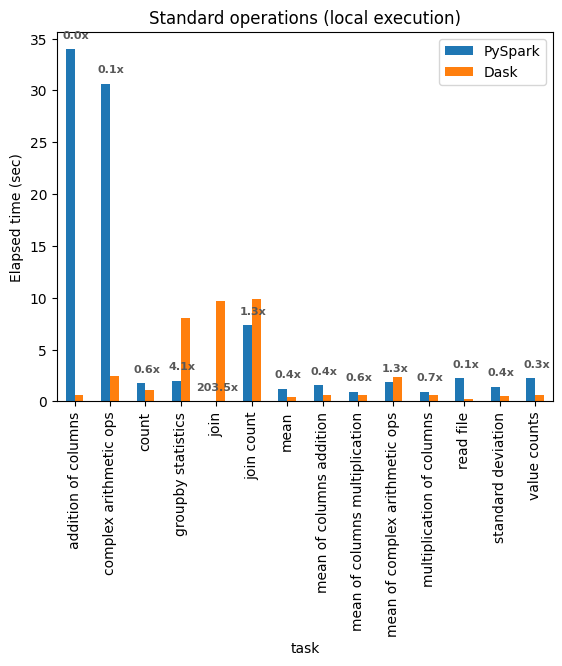

In [15]:
plot_title = 'Standard operations (local execution)'
 
ax = standard_ops.sort_index().plot.bar(title=plot_title)
ax.set_ylabel("Elapsed time (sec)")
 
tmp_df_x_times_faster = standard_ops.sort_index().copy()
tmp_df_x_times_faster['Dask / PySpark'] = tmp_df_x_times_faster.Dask / tmp_df_x_times_faster['PySpark']
tmp_df_x_times_faster['PySpark / Dask'] = tmp_df_x_times_faster['PySpark'] / tmp_df_x_times_faster.Dask
annotate_x_times_faster(ax, x_times_list=tmp_df_x_times_faster['Dask / PySpark'].to_list())

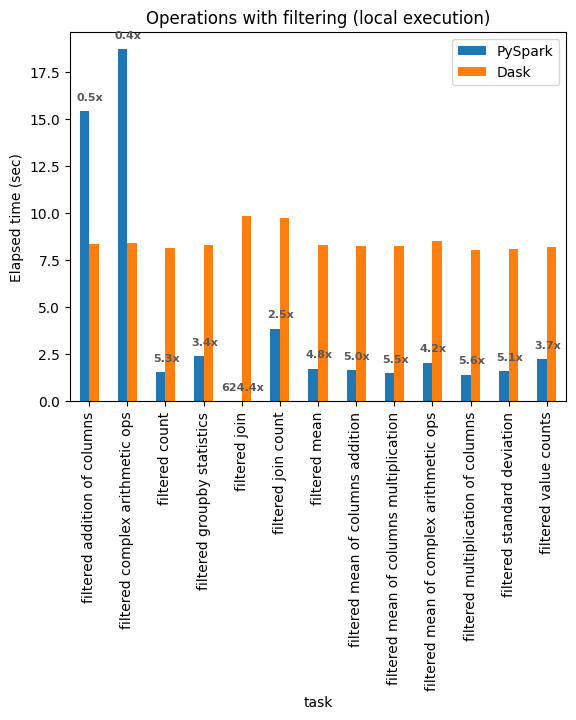

In [16]:
plot_title = 'Operations with filtering (local execution)'
 
ax = ops_with_filtering.sort_index().plot.bar(title=plot_title)
ax.set_ylabel("Elapsed time (sec)")
 
tmp_df_x_times_faster = ops_with_filtering.sort_index().copy()
tmp_df_x_times_faster['Dask / PySpark'] = tmp_df_x_times_faster.Dask / tmp_df_x_times_faster['PySpark']
tmp_df_x_times_faster['PySpark / Dask'] = tmp_df_x_times_faster['PySpark'] / tmp_df_x_times_faster.Dask
annotate_x_times_faster(ax, x_times_list=tmp_df_x_times_faster['Dask / PySpark'].to_list())